In [ ]:
import os, sys
repo_dir = os.path.dirname(os.getcwd())
sys.path.insert(1, repo_dir)

In [ ]:
import torch
from autoregressive import ARProcessPerturb3Channel
from utils import show, batch_normalize
from torchvision.utils import make_grid

### Load coefficients from file

In [ ]:
# Note: the coeffients from params-classes-10-mr-10.pt are exactly the same as
#       those declared as RANDOM_3C_AR_PARAMS_RNMR_10 in autoregressive.py
coefficients = torch.load(os.path.join(repo_dir, 'params-classes-10-mr-10.pt'))

### Generate 3-channel AR perturbations using coefficients

In [ ]:
ar_processes = []
for i in range(len(coefficients)):
    ar_p = ARProcessPerturb3Channel(b=coefficients[i])
    ar_processes.append(ar_p)

In [ ]:
generated = []
for arp in ar_processes:
    gen, _ = arp.generate(size=(36,36), eps=1.0, crop=4, p=2)
    generated.append(gen)

### Plot

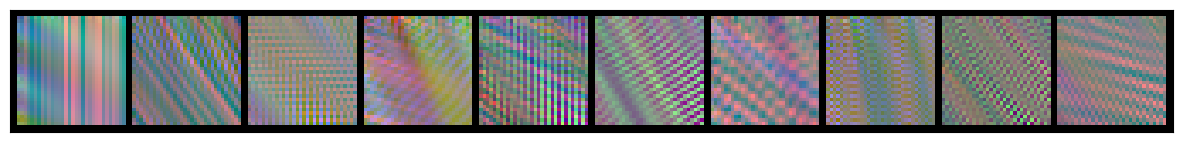

In [ ]:
to_display = torch.stack(generated)
show(make_grid(batch_normalize(to_display), nrow=10))

### Check imperceptibility constraint (norm)

In [ ]:
# Print L2 norm of every perturbation
torch.norm(to_display, p=2, dim=(1,2,3))

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])